***Author:Vishnupriya Nandakumar***

***Date  :03/16/2021***
***

# Context: 

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

Here we are going to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. 

 
# Objective: 

1.	Explore and visualize the dataset.
2.	Build a linear regression model to predict the prices of used cars.
3.	Generate a set of insights and recommendations that will help the business.


# Data:

1.	S.No. : Serial Number
2.	Name : Name of the car which includes Brand name and Model name
3.	Location : The location in which the car is being sold or is available for purchase Cities
4.	Year : Manufacturing year of the car
5.	Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
6.	Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7.	Transmission : The type of transmission used by the car. (Automatic / Manual)
8.	Owner : Type of ownership
9.	Mileage : The standard mileage offered by the car company in kmpl or km/kg
10.	Engine : The displacement volume of the engine in CC.
11.	Power : The maximum power of the engine in bhp.
12.	Seats : The number of seats in the car.
13.	New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
14.	Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

### Import the necessary packages

In [1]:
# Import necessary libraries.
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

### Load and explore the data

In [2]:
data=pd.read_csv("used_cars_data.csv")

In [3]:
# copying data to another varaible to avoid any changes to original data
df = data.copy()

### View the first and last 5 rows of the dataset.

In [4]:
# looking at head -first 5 observations
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
# looking at tail -last 5 observations
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


**Observations**

* S.No are just index numbers and it is safe to drop that variable
* Name variable contains Car Company Name and Car Model ,so it's better to split this into 2 columns-car_name & car_model
* Location is a categorical variable 
* Year can be categorical in this context as car edition belongs to a year and we want to look into it later. 
* Kilometers_Driven is numercial and continous variable
* Fuel Type,Transmission and Owner_Types are categorical variables 
* Mileage is continous variable , we need to remove km/kg or kmpl 
* Engine is continous variable , we need to remove CC 
* Power is continous variable , need to remove bhp
* Seats is numercial and discrete
* New_Price - Its numercial and continous;standarize it and remove lakh
* Price is numercial and continous variable
 
This preview also shows that New Price & Price columns potentially have a lot of missingness so we'll want to make sure to look into that later

In [6]:
df.drop(['S.No.'],axis=1,inplace=True)

## Check the shape of the dataset

In [7]:
df.shape

(7253, 13)

### Check column types and missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


## Observations

* Year can be categorical in this context as car edition belongs to a year and we want to look into it later. 
* Mileage is continous variable,we need to  convert to float64 .It contain 2 Missing values
* Engine is continous variable,we need to remove CC & convert to int64 .It contain missing values
* Power is continous variable,need to remove bhp, convert to float64.It contain missing values
* Seats is numercial and discrete. It has contain lot of missing values.NAN itself is float,so leaving this as-is
* New_Price is numercial and continous ,convert to float64,standarize it and remove lakh.It contain missing values


# Processing columns & Fixing data types

### Converting New Price column having value in crores to lacs

In [9]:
#function for converting columns (New Price) having value in crores to lacs
def fun_convertToLacs(x):
    """ function for converting columns having value in crores to lacs"""
    if(str(x).find('Cr')!=-1):
        returnvalue = float(str(x)[:-3])*100
        returnvalue = str(round(returnvalue,2)) + " Lakh"
        return returnvalue
    else: return x

In [10]:
df['New_Price'].replace(np.nan, 0.0, inplace= True) # replacing NAN values with 0.0 before applying above function
df['New_Price'] = df['New_Price'].apply(fun_convertToLacs) # Apply above function
df['New_Price'].replace(0.0, np.nan, inplace= True) # replacing 0.0 values with NAN after applying above function

### Converting data types & removing string units(Mileage -km/kg or kmpl,Engine-CC, Power-bhp,New_Price-Lakh)attached to integer 

In [11]:
#Converting data types & removing string units(Mileage -km/kg or kmpl,Engine-CC, Power-bhp,New_Price-Lakh)attached to integer 
#pd.to_numeric() is one of the general functions in Pandas which is used to convert argument to a numeric type
#Using errors=’coerce’.It will replace all non-numeric values with NaN.

df['Mileage']=pd.to_numeric(df['Mileage'].astype(str).str[:-5], errors='coerce')
df['Power']=pd.to_numeric(df['Power'].astype(str).str[:-4], errors='coerce')
df['New_Price']=pd.to_numeric(df['New_Price'].astype(str).str[:-5], errors='coerce')
df['Engine']=pd.to_numeric(df['Engine'].astype(str).str[:-2], errors='coerce')

In [12]:
#Convert Year to a categorical variable in this context
df['Year']=df['Year'].astype("category")

In [13]:
#Now  Check column types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   object  
 2   Year               7253 non-null   category
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   object  
 5   Transmission       7253 non-null   object  
 6   Owner_Type         7253 non-null   object  
 7   Mileage            7251 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7200 non-null   float64 
 11  New_Price          1006 non-null   float64 
 12  Price              6019 non-null   float64 
dtypes: category(1), float64(6), int64(1), object(5)
memory usage: 688.0+ KB


In [14]:
# Now check random sample of data 
df.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5391,Mahindra XUV500 W8 2WD,Kochi,2012,82103,Diesel,Manual,First,15.10,2179.0,140.00,7.0,NaN,6.20
164,Ford Ecosport 1.5 DV5 MT Ambiente,Kochi,2014,147898,Diesel,Manual,First,22.70,1498.0,89.84,5.0,NaN,4.42
6949,Honda CR-V 2.4 AT,Kochi,2011,100922,Petrol,Automatic,Second,10.10,2354.0,152.00,5.0,NaN,NaN
715,BMW 3 Series 320d Corporate Edition,Kolkata,2013,38998,Diesel,Automatic,First,16.07,1995.0,181.00,4.0,NaN,17.00
6222,BMW 3 Series 320d Luxury Line,Delhi,2014,41309,Diesel,Automatic,First,18.88,1995.0,184.00,5.0,NaN,NaN
2750,Maruti Celerio ZDi,Kolkata,2015,33517,Diesel,Manual,First,27.62,793.0,47.00,5.0,NaN,3.10
437,Volvo V40 D3,Bangalore,2015,33000,Diesel,Automatic,Second,16.80,1984.0,150.00,5.0,NaN,22.00
3021,Skoda Laura Ambiente 2.0 TDI CR MT,Delhi,2013,81755,Diesel,Manual,First,20.00,1968.0,108.50,5.0,NaN,4.75
1950,Hyundai i20 Magna,Delhi,2012,54000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,NaN,3.30
6794,Mahindra XUV500 W8 4WD,Bangalore,2014,50299,Diesel,Manual,First,15.10,2179.0,140.00,7.0,NaN,NaN


* String units(Mileage -km/kg or kmpl,Engine-CC, Power-bhp,New_Price-Lakh)attached to integers got removed

### Splitting the column Name into 2 columns-Brand and Model

In [15]:
# Handling the delimiters
df[['Brand','Model']] = df["Name"].str.split(" ", 1, expand=True)

# Removing the Name and model colum  
df = df.drop(['Name','Model'],axis =1)


In [16]:
df.sample(10)


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
6248,Chennai,2017,18000,Petrol,Manual,First,18.90,1197.0,82.0,5.0,NaN,NaN,Hyundai
415,Chennai,2010,92098,Diesel,Automatic,Second,16.00,2400.0,215.0,5.0,NaN,7.25,Volvo
1136,Pune,2012,67200,Petrol,Manual,First,15.04,1598.0,103.6,5.0,NaN,3.90,Volkswagen
7192,Chennai,2012,35161,Petrol,Manual,First,17.50,1298.0,85.8,5.0,NaN,NaN,Maruti
1129,Ahmedabad,2018,38000,Diesel,Manual,First,24.52,1248.0,88.5,7.0,NaN,8.70,Maruti
2504,Kochi,2015,69749,Diesel,Manual,First,18.60,1388.0,67.0,5.0,NaN,3.82,Ford
3954,Pune,2006,67196,Petrol,Manual,First,17.30,993.0,60.0,5.0,NaN,1.25,Maruti
6257,Jaipur,2011,90198,Diesel,Manual,Second,19.30,1248.0,73.9,5.0,NaN,NaN,Maruti
630,Chennai,2007,30441,Petrol,Manual,First,15.90,1298.0,85.0,5.0,NaN,1.45,Maruti
560,Jaipur,2009,48000,Diesel,Automatic,First,17.00,1896.0,105.0,5.0,NaN,5.00,Skoda


* New column called Brand got added with just car brand name

In [17]:
df.describe(include="all")

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
count,7253,7253.0,7.253000e+03,7253,7253,7253,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000,7253
unique,11,23.0,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN,NaN,33
top,Mumbai,2015.0,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,NaN,Maruti
freq,949,929.0,NaN,3852,5204,5952,NaN,NaN,NaN,NaN,NaN,NaN,1444
mean,NaN,NaN,5.869906e+04,NaN,NaN,NaN,18.141580,1616.573470,112.765214,5.279722,22.779692,9.479468,NaN
std,NaN,NaN,8.442772e+04,NaN,NaN,NaN,4.562197,595.285137,53.493553,0.811660,27.759344,11.187917,NaN
min,NaN,NaN,1.710000e+02,NaN,NaN,NaN,0.000000,72.000000,34.200000,0.000000,3.910000,0.440000,NaN
25%,NaN,NaN,3.400000e+04,NaN,NaN,NaN,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000,NaN
50%,NaN,NaN,5.341600e+04,NaN,NaN,NaN,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000,NaN
75%,NaN,NaN,7.300000e+04,NaN,NaN,NaN,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000,NaN


## Insights:

- The "Location" column has 11 & Year column has 23 unique values i.e; data is collected from 11 locations for about 23 years
- The "Fuel_type" column has 5 uniq ue values. i.e. CNG,Diesel,Petrol,Electric,LPG
- The "Transmission" column has 2 unique values .i.e; Manual and Automatic
- The "Owner_Type" column has 4 unique values .i.e;First ,Second,Third, Fourth & Above
- The "Brand" column has 33 unique values and Maruti is the most common brand among used cars
- Average Price is 9.479468
- For Kilometers_Driven,Engine,Power,Seats,New_Price -There is a significant difference between between the 75th percentile and maximum value which also indicates outliers.

## Data Visualisation

### Univaraite analysis

### Lets expore dependent varaible -Price

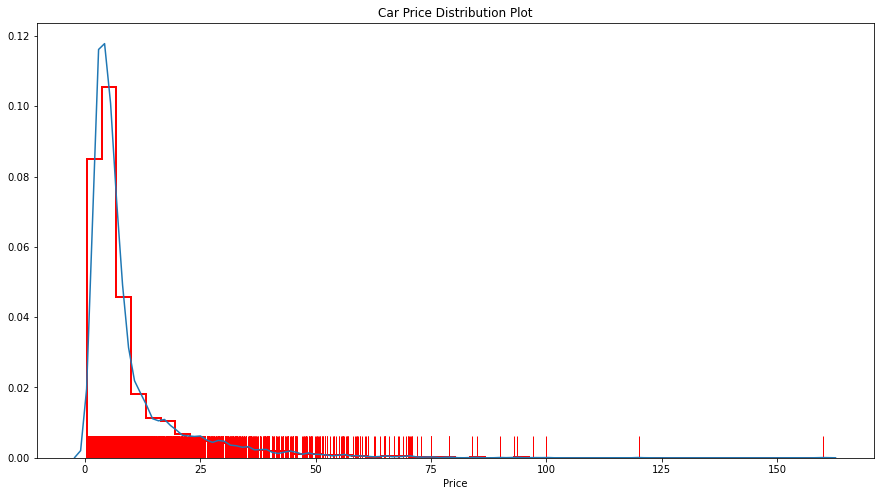

In [18]:
#Plotting Car price distribution using distribution plot

plt.figure(figsize=(15,8))

# plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')

# sns.distplot(car.price, rug=True, color="y")
sns.distplot(df.Price, rug=True, rug_kws={"color": "r"},
            hist_kws={"histtype": "step", "linewidth": 2,
                             "alpha": 1, "color": "r"})
plt.show()

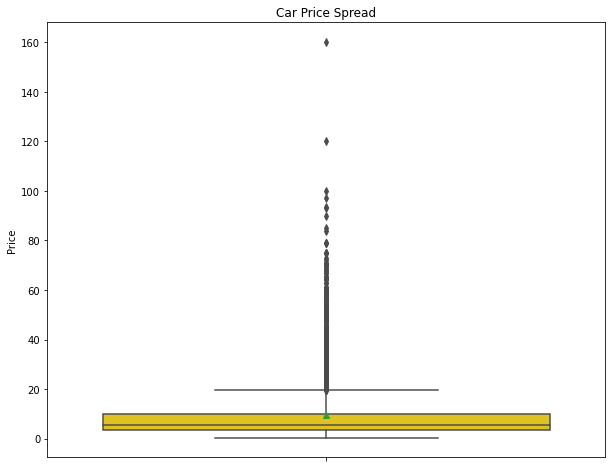

In [19]:
#Plotting Car Price using Box Plot
plt.figure(figsize=(10,8))
plt.title('Car Price Spread')
sns.boxplot(y=df.Price,showmeans=True,palette='prism')
plt.show()

#### Observations

* The density curve is right-skewed, which indicates that most of the prices are low.
* From the boxplot it is evident that there is not much difference between the mean and the median of the price distribution.
* The extreme values lying above the whiskers in the boxplot indicate that there are lot of outliers 
* The significant difference between between the 75th percentile and maximum price value also indicates outliers.

## Distribution of each numerical variable.

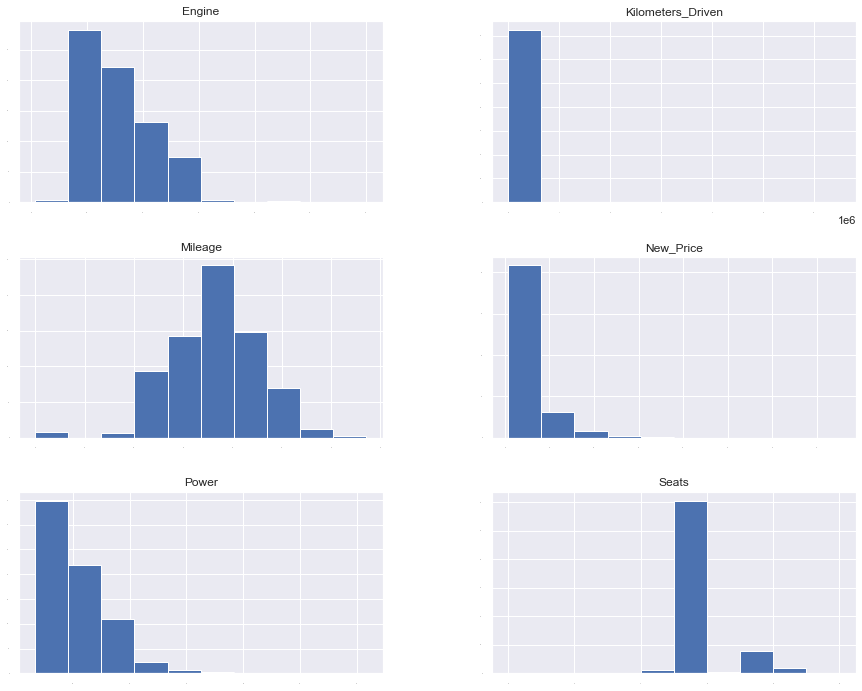

In [20]:
# To plot histograms and to check distribution of all numeric variables in a dataframe
sns.set(rc={'figure.figsize':(11.7,8.27)})
data_numeric = df[['Kilometers_Driven','Mileage','Engine','Power','Seats','New_Price']]
data_numeric.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize =(15,12) )
plt.show()

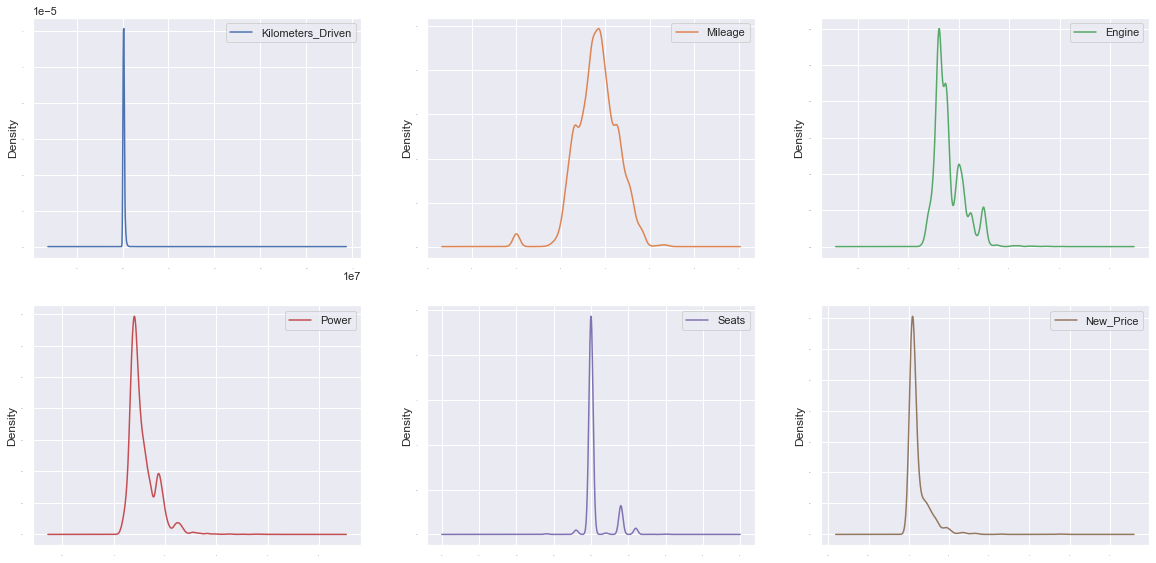

In [21]:
#Plotting density curve for all numeric variables in data set
data_numeric.plot(kind='density',subplots=True, layout=(3,3), sharex=False, legend=True, fontsize=1, figsize=(20,15))
plt.show()

**Observation**
* Mileage follows a normal distribution
* Kilometers_Driven,Engine,Power,Seats,New_Price are right skewed 

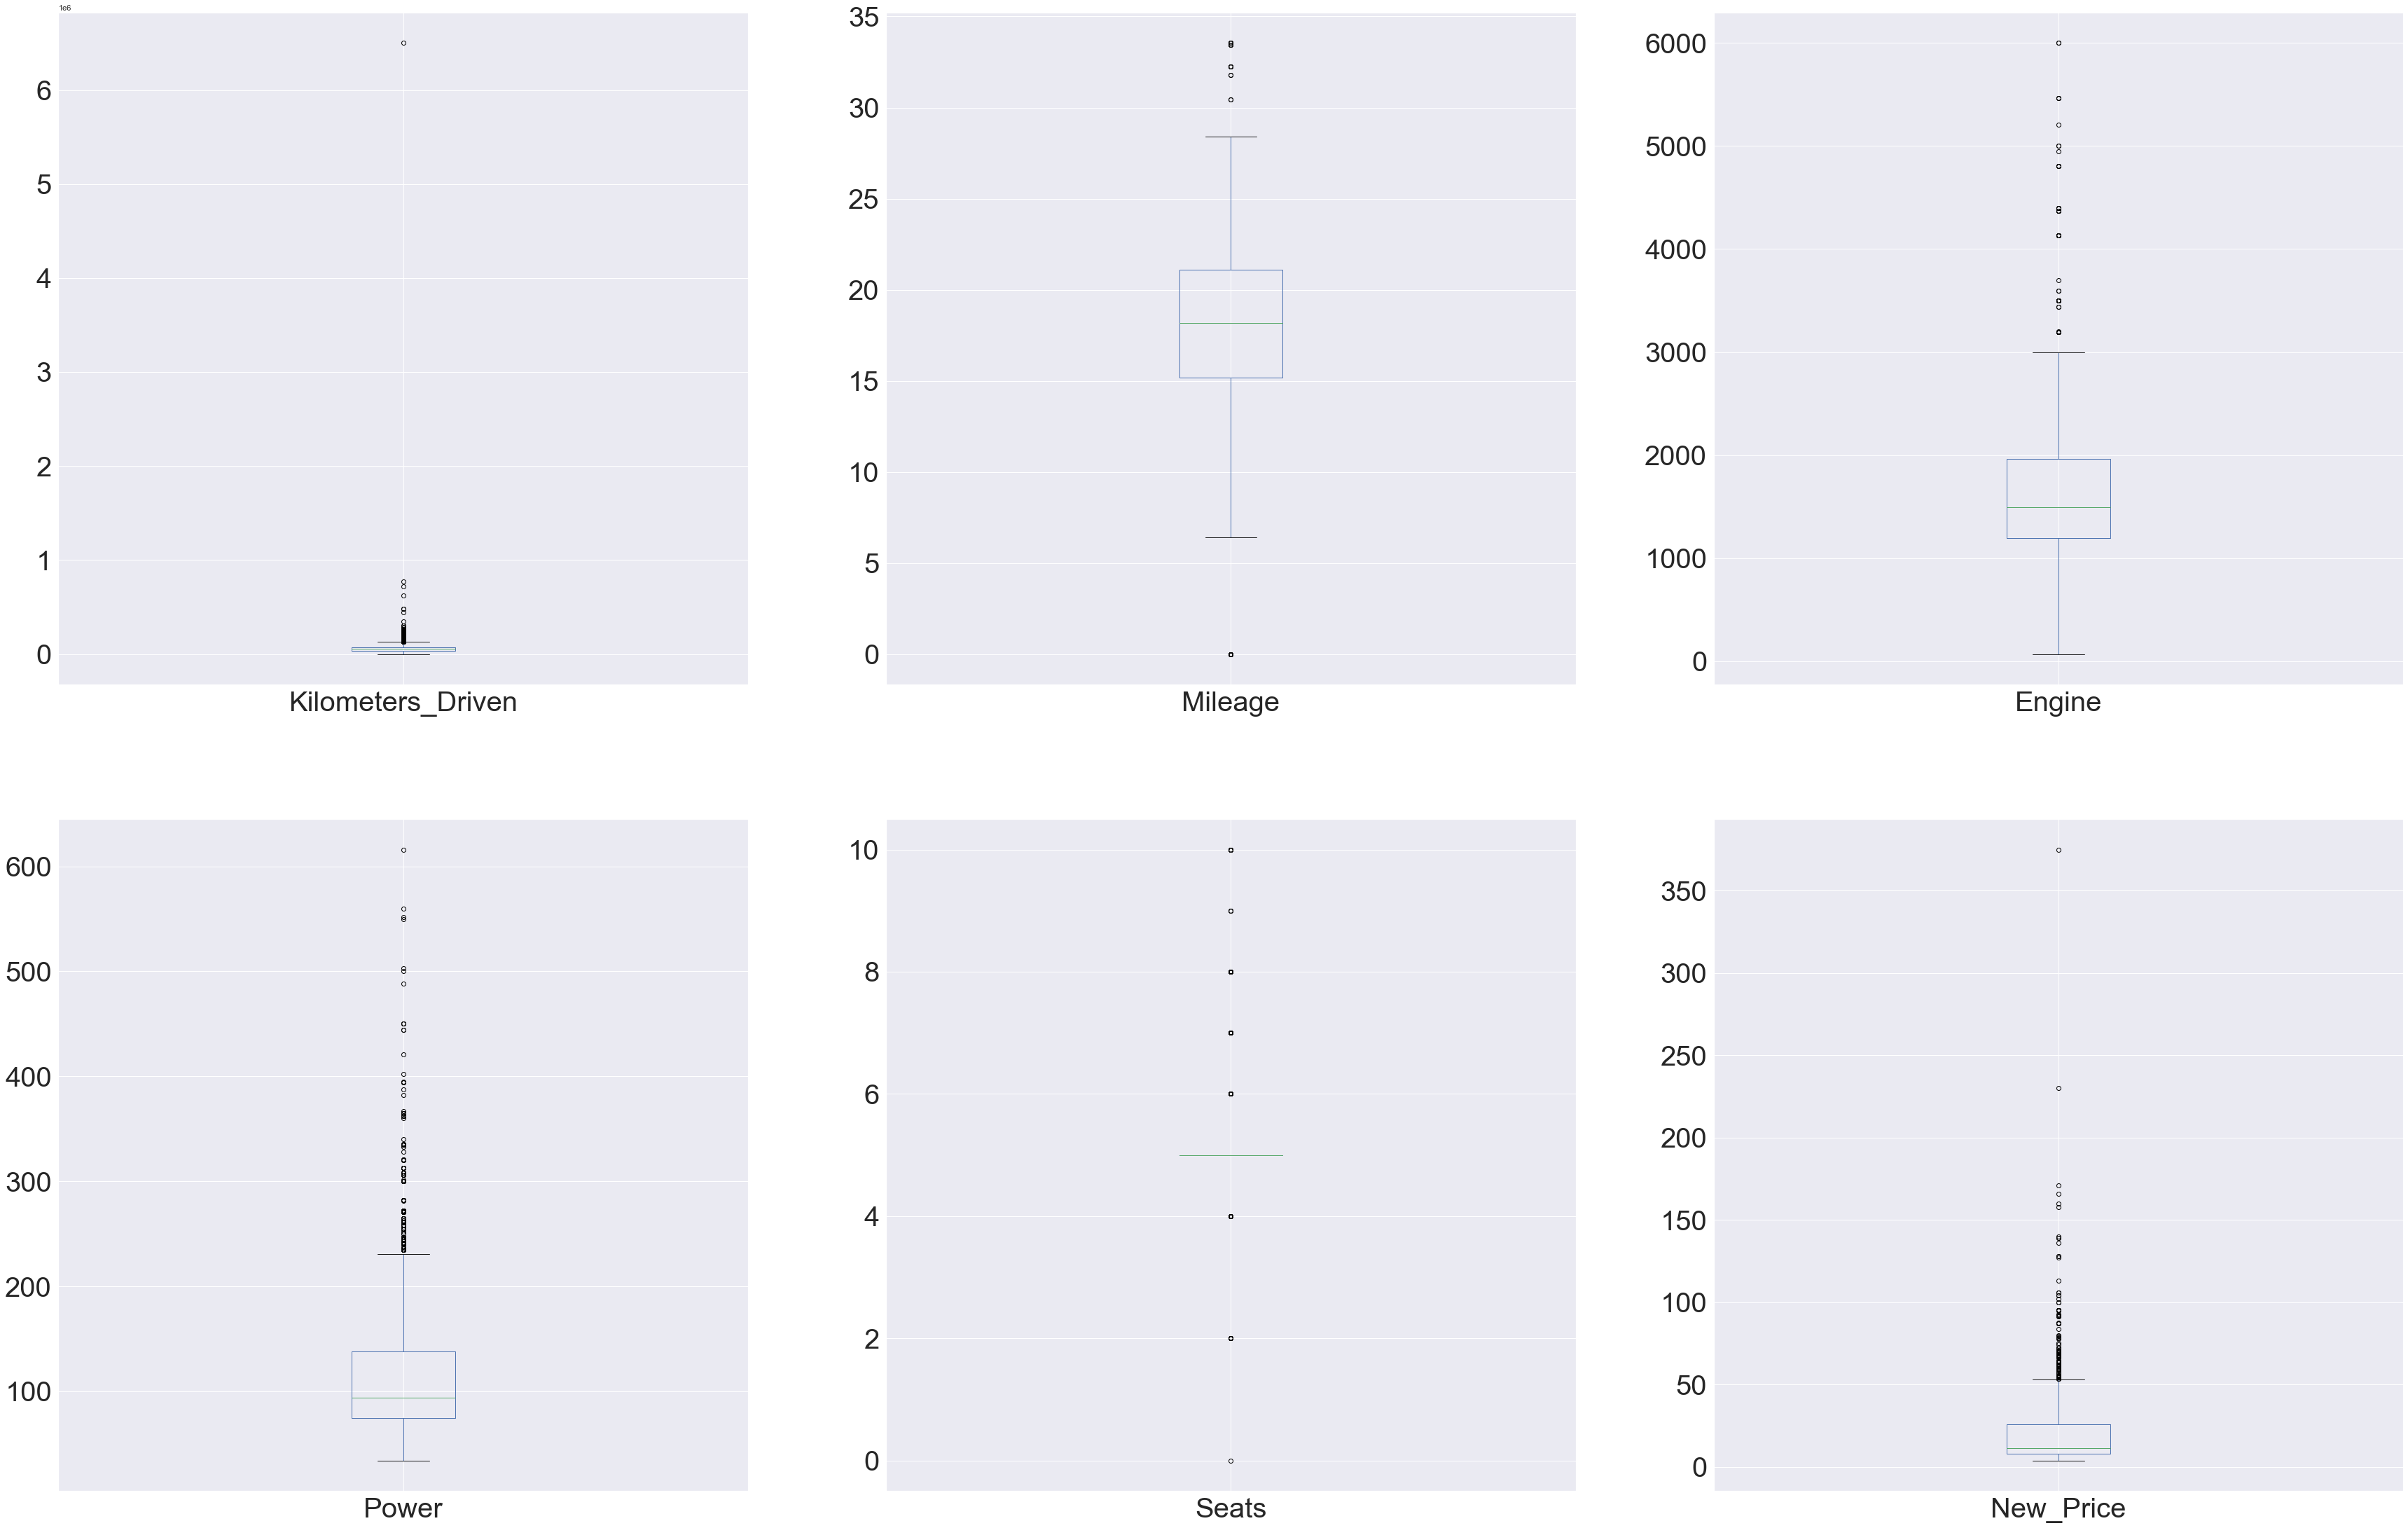

In [22]:
#Plotting Box plot for all numeric variables in data set
data_numeric.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,
fontsize=40, figsize = (60, 60))
plt.show()

**Observation**
* Visvualization indicates there are outliers in Kilometers_Driven, Mileage, Engine, Power and New Price
* Mileage has less outliers compared to Kilometers_Driven, Engine, Power, Seats and New Price


### Univariate Analysis for all features having categorical data

In [23]:
# Function to create barplots 
def bar_per(plot, attribute):
    total = len(attribute) # length of the column
    for p in car.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        car.annotate(percentage, (x, y), size = 12) # annotate the percantage] 

### Observation on Location

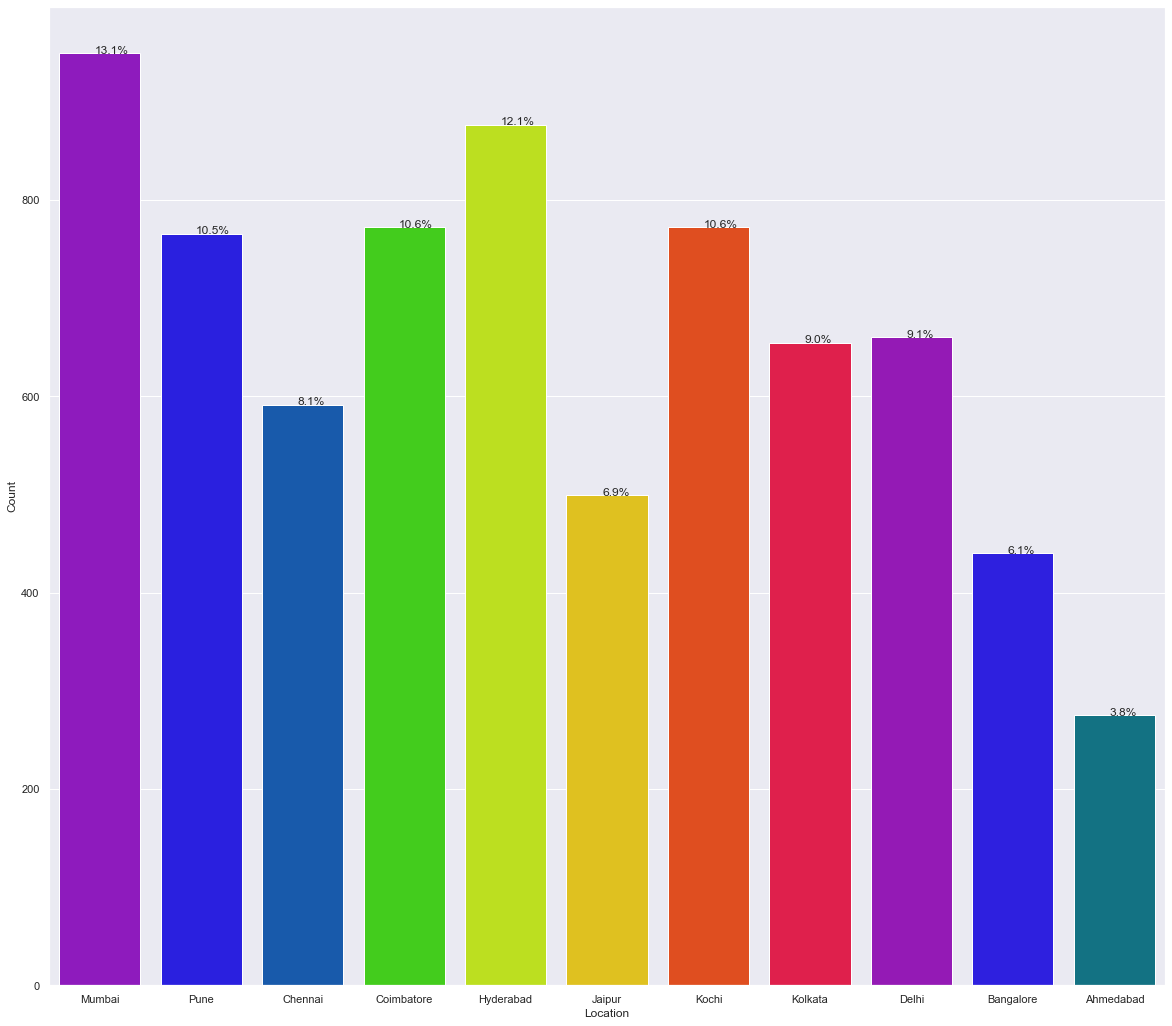

In [24]:
plt.figure(figsize=(20,18)) 
car = sns.countplot(df['Location'],palette='prism') #count plot for sex Variable
plt.xlabel('Location') #Label to be displayed in X-axis
plt.ylabel('Count') #Label to be displayed in Y-axis
bar_per(car,df['Location'])

#### Obervation
* Mumbai is the city in which highest number (13 %) of cars are being sold ,followed by Hyderabad (12.1%)
* Ahmedabad has the least number of cars (3.8%) being sold

### Observation on Fuel_Type

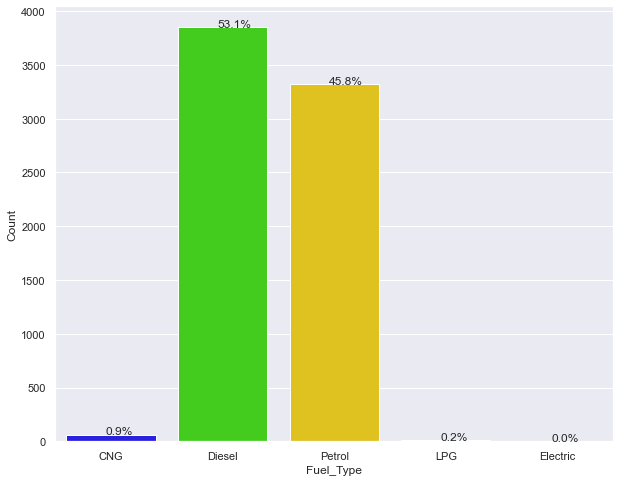

In [25]:
plt.figure(figsize=(10,8)) 
car = sns.countplot(df['Fuel_Type'],palette='prism') #count plot for sex Variable
plt.xlabel('Fuel_Type') #Label to be displayed in X-axis
plt.ylabel('Count') #Label to be displayed in Y-axis
bar_per(car,df['Fuel_Type'])

#### Obervation
* Diseal is the most commonly used  (53.1 %) type of Fuel ,followed by Petrol (45.8%)
* Electric  is not used and CNG(0.9 %) and LPG ( 0.2 %) are used very less

### Observation on Transmission

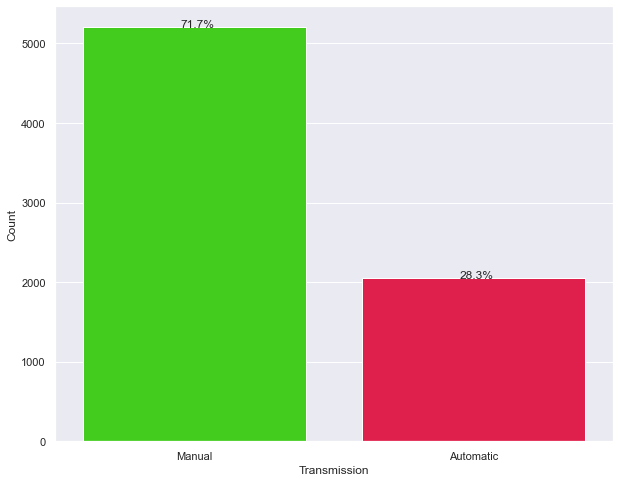

In [26]:
plt.figure(figsize=(10,8)) 
car = sns.countplot(df['Transmission'],palette='prism') #count plot for sex Variable
plt.xlabel('Transmission') #Label to be displayed in X-axis
plt.ylabel('Count') #Label to be displayed in Y-axis
bar_per(car,df['Transmission'])

#### Obervation
* Manual is the most commonly used (71.7 %) type of transmission


### Observation on Owner_Type

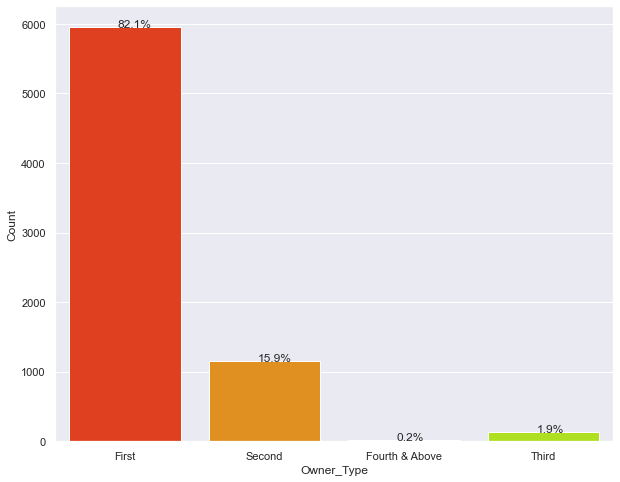

In [27]:
plt.figure(figsize=(10,8)) 
car = sns.countplot(df['Owner_Type'],palette='prism') #count plot for sex Variable
plt.xlabel('Owner_Type') #Label to be displayed in X-axis
plt.ylabel('Count') #Label to be displayed in Y-axis
bar_per(car,df['Owner_Type'])

#### Obervation
* First ownership is the most Frequent (82.1 %) followed by Second( 15.9%), Third (1.9%) and Fourth & Above(0.2 %)

### Observation on Brand 

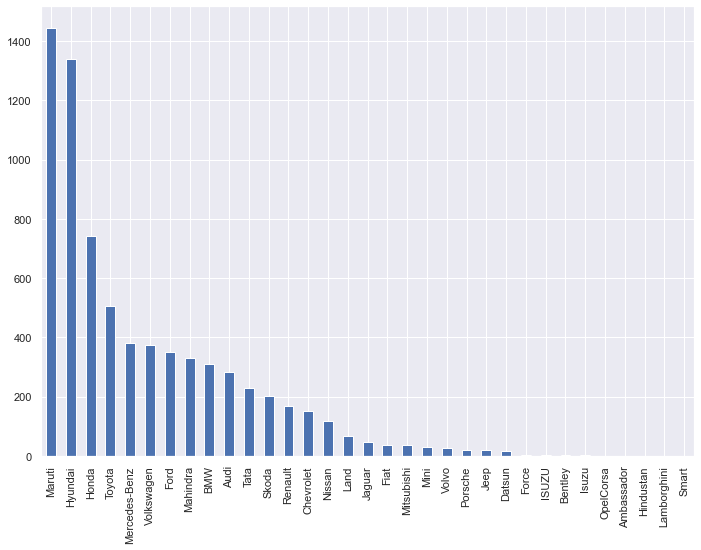

In [28]:
#Plotting Car Brand
df['Brand'].value_counts().plot(kind='bar')
plt.show()

#### Obervation
* Maruti is the most common brand of used car followed by Hyundai

### Observation on Year

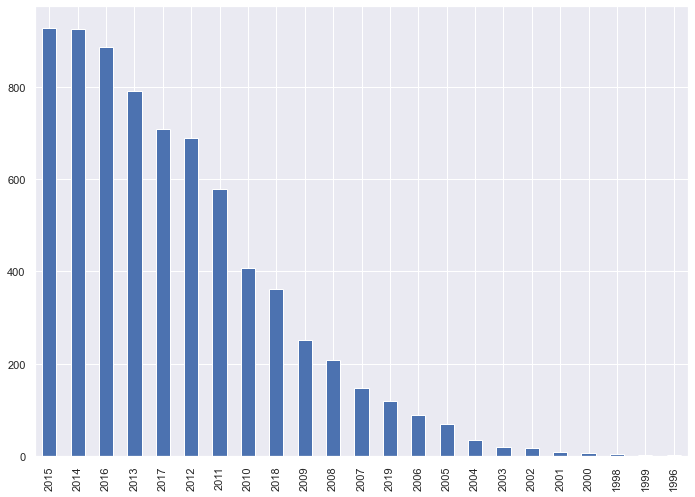

In [29]:
#Plotting Year
df['Year'].value_counts().plot(kind='bar')
plt.show()

#### Obervation
* Cars manufactured in year 2015 ,2014 have high demand in pre-owned car market 

## Bivariate Analysis

### Correlation -Verifying correlation among numerical variables

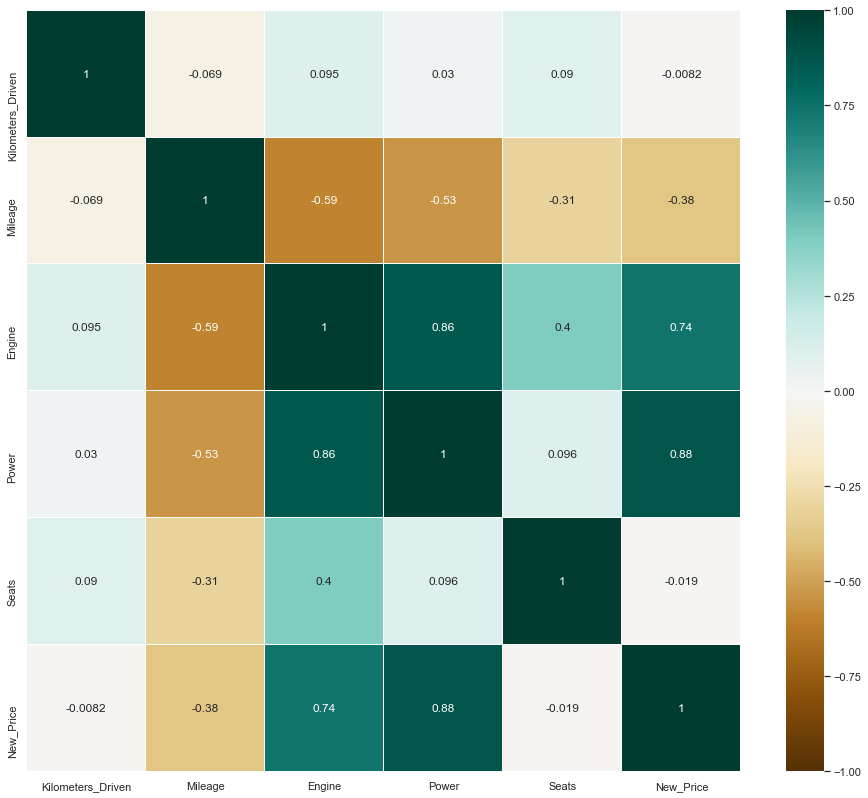

In [30]:
plt.figure(figsize = (16,14)) # Fig size

num_features = ['Kilometers_Driven','Mileage','Engine','Power','Seats','New_Price'] # Numerical Columns

sns.heatmap(df[num_features].corr(), 
            annot = True,
            cmap="BrBG" , 
            robust=True,
            linewidth=0.1,
            vmin=-1)# cmap = 'Blues'
plt.show()


#### Obervation
* Power and New Price are highly correlated
* New Price & Engine also have a postive corelation
* Though Seats & Power have very less correlation ,it's a positive correlation
* Kilometers_Driven &  Mileage are negatively correlated with New Price ,
* Seats ,Power ,Engine, Kilometers_Driven are negatively coorelated with New_Price

### Correlation among numerical variables with Price

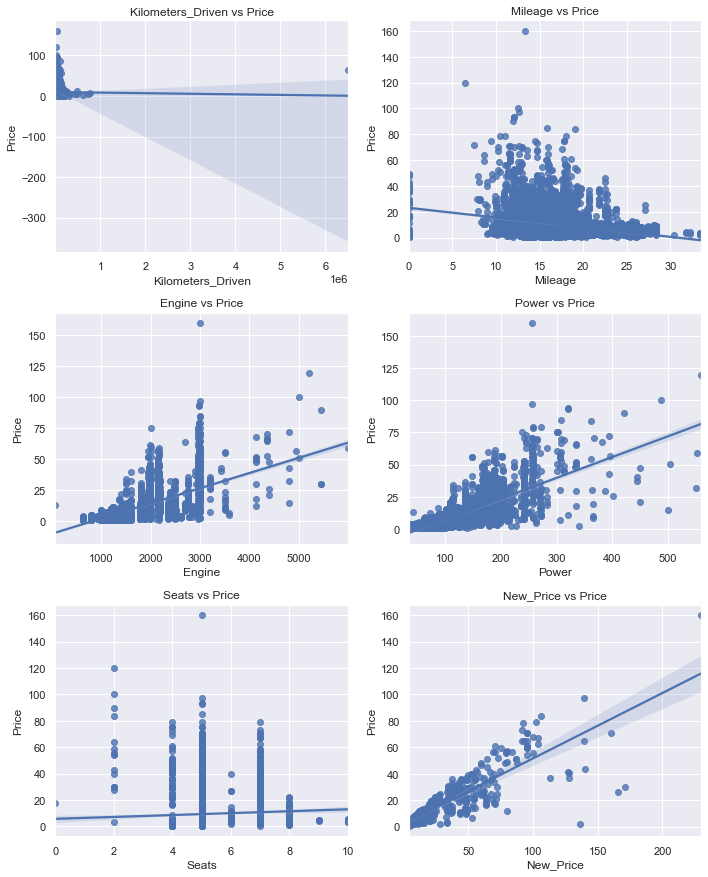

In [31]:
def regplot(x,fig):
    plt.subplot(5,2,fig)
    sns.regplot(df[x],df['Price'])
    plt.title(x +' '+'vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

regplot('Kilometers_Driven', 1)
regplot('Mileage', 2)
regplot('Engine', 3)
regplot('Power', 4)
regplot('Seats', 5)
regplot('New_Price', 6)

plt.tight_layout()

#### Obervation
* Kilometers_Driven , Mileage are negatively correlated with Price.
* Power ,Engine and New Price have positive correlation with Price 

### Price vs Power vs Brand

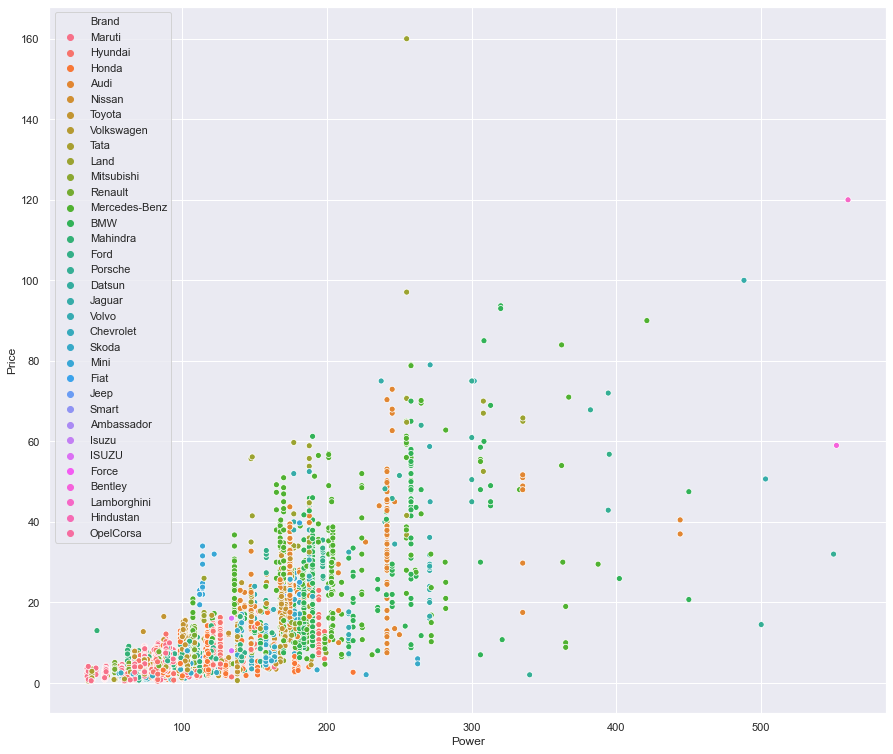

In [32]:
# Lets look visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Power', hue='Brand', data=df);

#### Obervation
* Just One Obervation-The Brand 'Bentley' have the highest Power around 600
* The Land Rover displays the highest Price where as it's power is around 250
* Tata and Maruti shows the lowest Price 
* The Avaerage Power of 112 is observed for Mahendra and Hyundai Brands


### Price vs Engine vs Brand

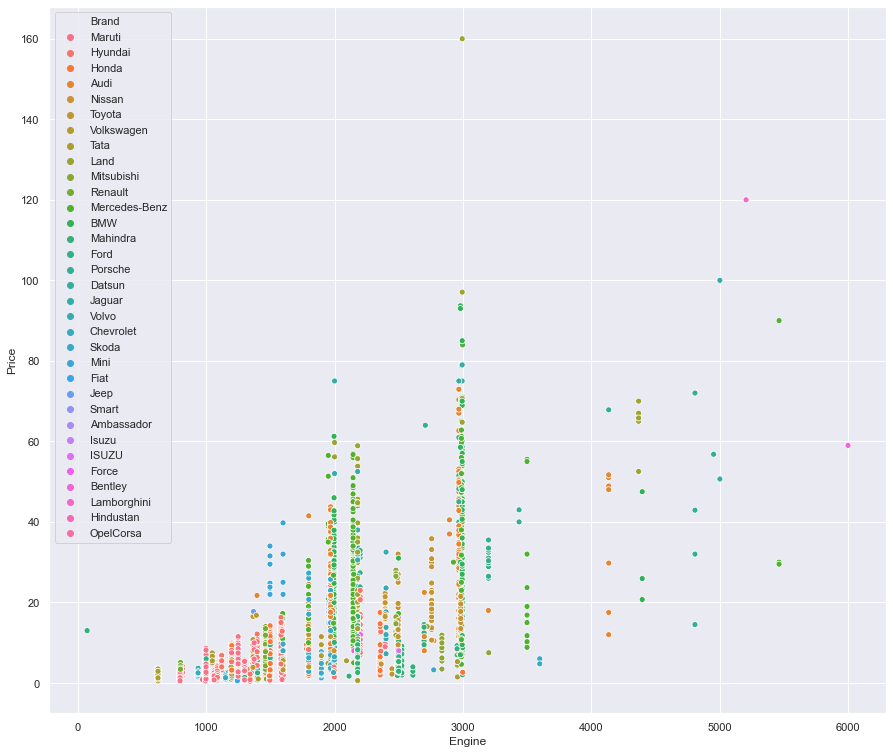

In [47]:
# Lets look visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Engine', hue='Brand', data=df);

#### Obervation
* Just One Obervation-The Brand 'Bentley' have the highest Engine around 6000CC
* The Land Rover with the highest Price  has engine around 3000CC
* Tata and Maruti shows the lowest Price and engine between 1000 CC & 1300 CC
* Most Barnds have engine size between 1000 and 3000CC with price below Rs.20 Lakhs

### Price vs New Price vs Brand

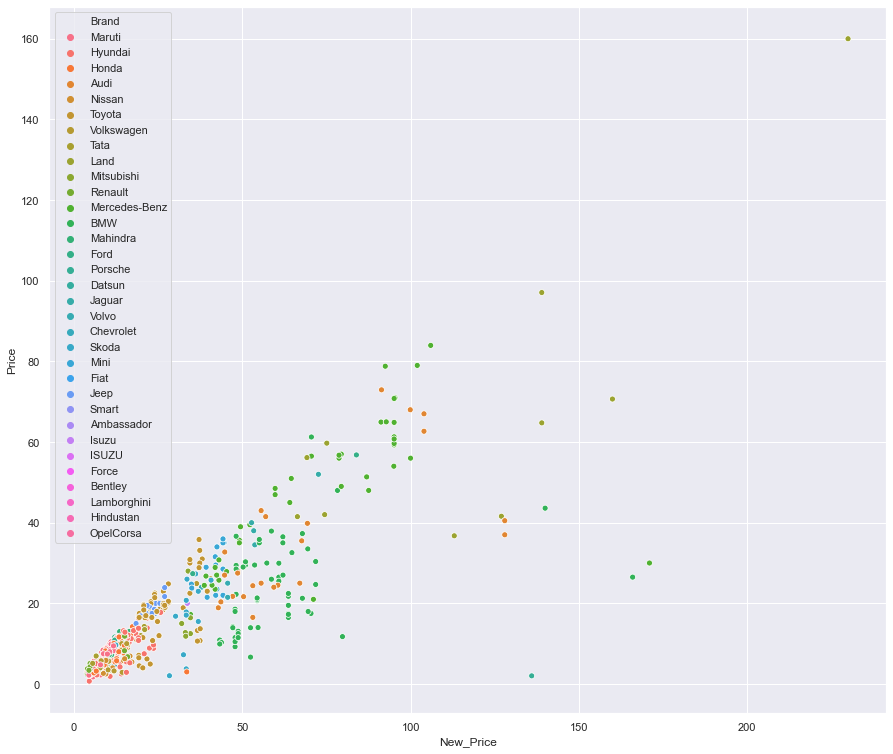

In [49]:
# Lets look visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='New_Price', hue='Brand', data=df);

#### Obervation
* The Land Rover show highest New Price and Price.
* For Most Barnds New Price is higher than Price of Used Cars
* The New Price for two of BMW series is over 150 Lakhs where its Price is around 26 Lakhs if its a used Car.

### Relationship among categorical variables with Price

In [52]:
#All Categorical columns
data_categorical = df[['Brand','Location','Year','Fuel_Type','Transmission','Owner_Type']]

### Location Vs Price

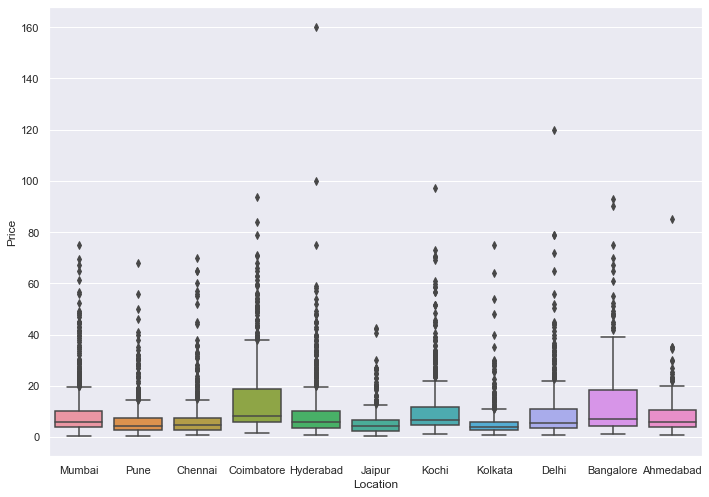

In [51]:
sns.boxplot(x = data_categorical.Location, y = df['Price'])#Plotting the graph using boxplot
plt.show()

#### Obervation
* Location doesn't impact much on the Price 
* Hyderabad Location shows the highest Price with an oulier of 160
* There are lot of outliers in above vizualization 

### Fuel Type Vs Price Vs Transmission

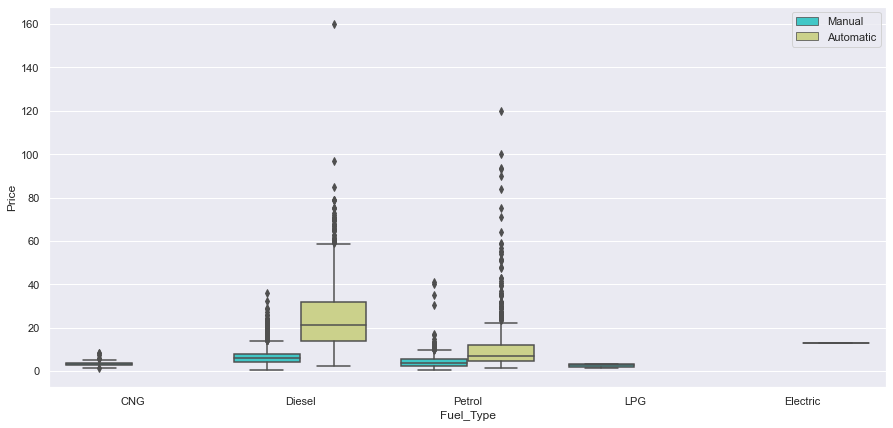

In [55]:
plt.figure(figsize=(15,7))#To resize plot size
sns.boxplot(x = data_categorical.Fuel_Type, y = df['Price'],hue=data_categorical.Transmission,palette="rainbow")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#### Obervation
* Most Cars in Pre-Owned Car Market are Diseal & Petrol card with Manual & Automatic Transmission Type
* The Diseal cars with Automatic Transamission are more pricy 
* There are lots of outliers in this Observartion


### Owner_Type Vs Price

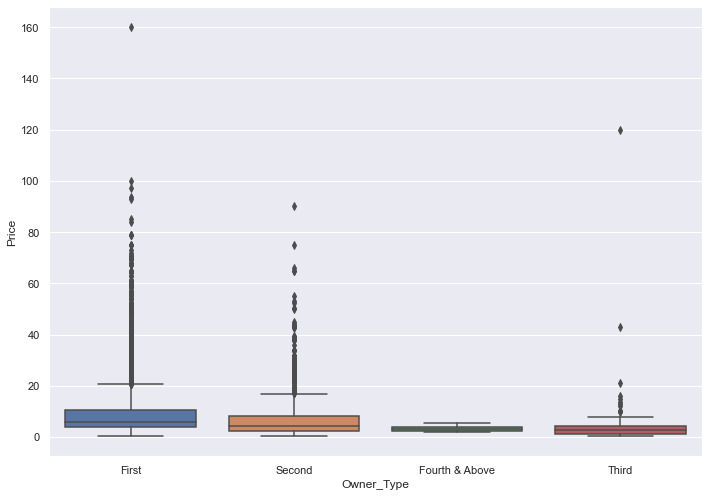

In [57]:
sns.boxplot(x = data_categorical.Owner_Type, y = df['Price'])#Plotting the graph using boxplot
plt.show()

#### Obervation
* Most Cars in Pre-Owned Car Market is of First Ownership Type and it is the more Pricy compared to other ownership
* There are card with Second Ownership is also in Market but it's Price is below 100 Lackhs.
* Only very few cars have Third and Fourth & Above type of Ownership

### Year Vs Price

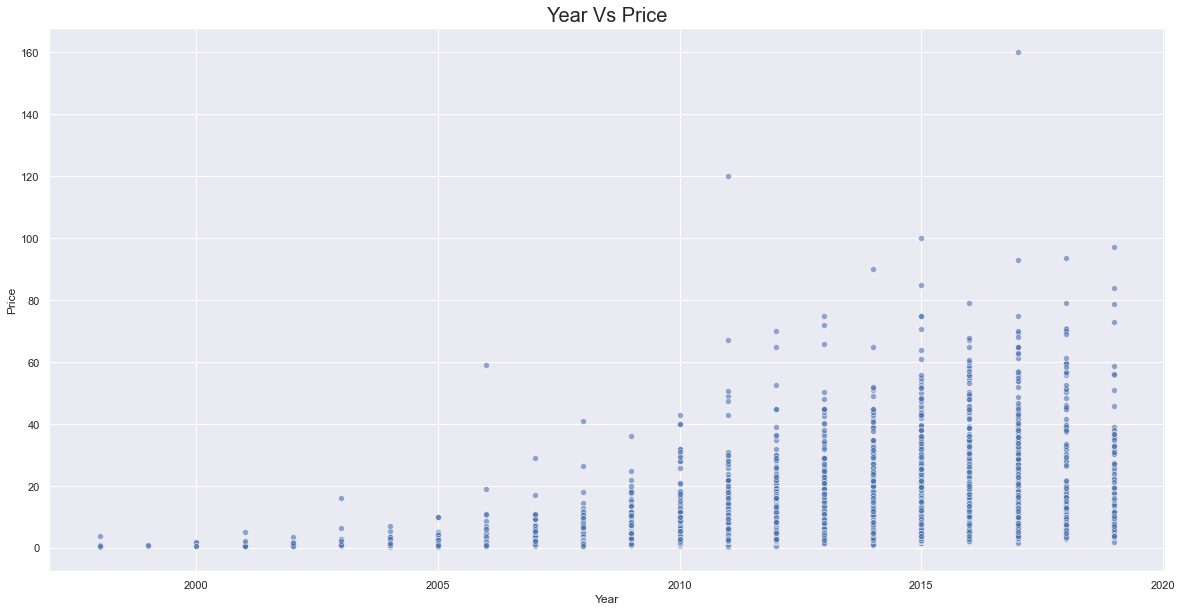

In [61]:
#Scatterplot to analyze the relationship of Year and Price
plt.figure(figsize=(20,10)) #To resize plot size
plt.title("Year Vs Price", fontsize=20)#Giving title
sns.scatterplot(df["Year"], df["Price"],palette="Dark2",alpha=0.6)#Plotting the graph
plt.show()

#### Obervation
* We could see a rise in Prices over the years with 2015 being the higest

# Data Preprocessing

## Missing Value Treatment 

In [69]:
# Mark Missing Values

df['Mileage'].replace(0.00, np.nan, inplace= True) #As Milage can't be 0.00
df['Seats'].replace(0.00, np.nan, inplace= True) #As Seats can't be 0.00


In [68]:
#No of null values for each feature
print(df.isnull().sum())

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                  54
New_Price            6247
Price                1234
Brand                   0
dtype: int64


In [70]:
#Take the Backup of data before filling missing values with Median/Mean
df1 = df.copy()

In [71]:
#Fill the  missing values .We are not filling Missing values of target variable Price
df1['Mileage']=df1['Mileage'].fillna(df1['Mileage'].median())
df1['Engine']=df1['Engine'].fillna(df1['Engine'].median())
df1['Power']=df1['Power'].fillna(df1['Power'].median())
df1['Seats']=df1['Seats'].fillna(df1['Seats'].median())
df1['New_Price']=df1['New_Price'].fillna(df1['New_Price'].mean())

In [72]:
#Now check No of null values for each feature
print(df1.isnull().sum())

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price               0
Price                1234
Brand                   0
dtype: int64


### Covert Seats and Engine feature to int

In [73]:
#Covert Seats and Engine feature to int asthose are numerical-discrete variables
df1['Seats']=df1['Seats'].astype(int)
df1['Engine']=df1['Engine'].astype(int)

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   object  
 1   Year               7253 non-null   category
 2   Kilometers_Driven  7253 non-null   int64   
 3   Fuel_Type          7253 non-null   object  
 4   Transmission       7253 non-null   object  
 5   Owner_Type         7253 non-null   object  
 6   Mileage            7253 non-null   float64 
 7   Engine             7253 non-null   int32   
 8   Power              7253 non-null   float64 
 9   Seats              7253 non-null   int32   
 10  New_Price          7253 non-null   float64 
 11  Price              6019 non-null   float64 
 12  Brand              7253 non-null   object  
dtypes: category(1), float64(4), int32(2), int64(1), object(5)
memory usage: 631.3+ KB


### Outlier Detection and Treatment

In [262]:
#Take data backup before removal of outliers
car_bkp1=df1.copy()

In [264]:
numeric_carval = car_bkp1[['Kilometers_Driven','Mileage','Engine','Power']]  
#We have only considered more corelated variables(Positive & Negative) to Price from above Vizualizations

### Treating the outiers

In [265]:
#Remove Outliers from  'Kilometers_Driven','Power','Engine','Mileage','New_Price'
Q1 = numeric_carval.quantile(0.25)
Q2 = numeric_carval.quantile(0.5)
Q3 = numeric_carval.quantile(0.75)

IQR = Q3-Q1
Min = Q1-(1.5*IQR)
Max = Q3+(1.5*IQR)

print("IQR : ",IQR)
print("")
print("Min : ",Min)
print("")
print("Q1 : ",Q1)
print("")
print("Q2 : ",Q2)
print("")
print("Q3 : ",Q3)
print("")
print("Max : ",Max)

IQR :  Kilometers_Driven    39000.00
Mileage                  5.70
Engine                 770.00
Power                   61.03
dtype: float64

Min :  Kilometers_Driven   -24500.000
Mileage                  6.850
Engine                  43.000
Power                  -14.545
dtype: float64

Q1 :  Kilometers_Driven    34000.0
Mileage                 15.4
Engine                1198.0
Power                   77.0
Name: 0.25, dtype: float64

Q2 :  Kilometers_Driven    53416.0
Mileage                 18.2
Engine                1493.0
Power                   94.0
Name: 0.5, dtype: float64

Q3 :  Kilometers_Driven    73000.00
Mileage                 21.10
Engine                1968.00
Power                  138.03
Name: 0.75, dtype: float64

Max :  Kilometers_Driven    131500.000
Mileage                  29.650
Engine                 3123.000
Power                   229.575
dtype: float64


In [266]:
#Check shape before removal of outliers
car_bkp1.shape

(7253, 13)

In [267]:
#Remove Outliers
car_bkp1 = car_bkp1[~((car_bkp1[['Kilometers_Driven','Mileage','Engine','Power']] < Min) | 
                          (car_bkp1[['Kilometers_Driven','Mileage','Engine','Power']] > Max)).any(axis=1)]

In [268]:
#Check shape after removal of outliers
car_bkp1.shape

(6689, 13)

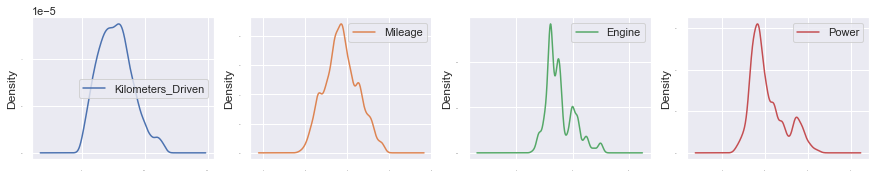

In [269]:
#Density Plot post outlier removal
numeric_carval = car_bkp1[['Kilometers_Driven','Mileage','Engine','Power']]
numeric_carval.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

In [270]:
numeric_carval['New_Price']=car_bkp1.New_Price
numeric_carval['Price']=car_bkp1.Price

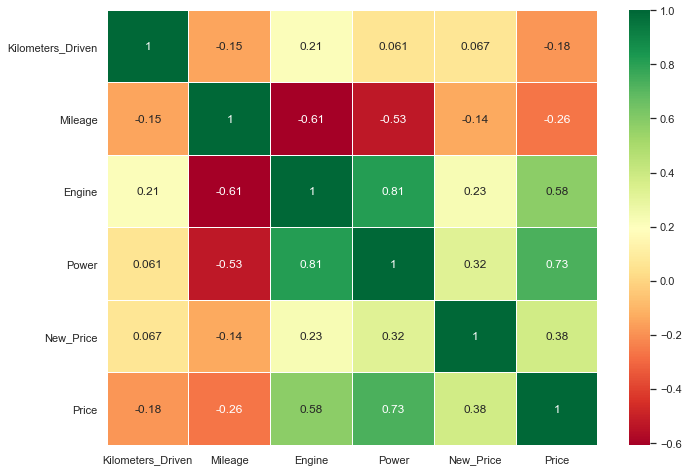

In [271]:
#After outlier Removal,check the coorelation
sns.heatmap(numeric_carval.corr(method='pearson'),annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(11,8)
plt.show()

#### After outlier removal, The data visvualization indicates Power (0.74) and Engine (0.58) are moderately corelated to Price

In [272]:
car_bkp1.head(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,22.779692,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,22.779692,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,8.610000,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,22.779692,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,22.779692,17.74,Audi


From the visualisation of categorical variables, we observe that car brand is also the governing factor for predicting the price of the car. Luxury cars seem more expensive

In [274]:
#Take data backup 
bkp2=car_bkp1.copy()

### Feature Engineering

In [275]:
Brand_grp = bkp2.pivot_table(values = 'Price', index = 'Brand',aggfunc ='mean').sort_values(by ='Price', ascending = False)
Brand_grp['Prices'] = Brand_grp['Price']
Brand_grp = Brand_grp.drop('Price',axis=1)
Brand_grp

,Prices
Brand,
Jaguar,34.205000
Land,32.077447
Mini,26.896923
Mercedes-Benz,23.842285
Audi,22.022312
BMW,20.467725
Isuzu,20.000000
Volvo,19.143000
Jeep,18.718667


### Group the Different brands of Car  into Economic , Medium , Luxury based on Price

In [276]:
Brand_grp = bkp2.merge(Brand_grp.reset_index(), how='left',on='Brand')

bins = np.linspace(min(Brand_grp['Prices']), max(Brand_grp['Prices']),4)

bin_name=['Economic','Medium','Luxury']

bkp2['class'] = pd.cut(Brand_grp['Prices'], bins, right=False, labels = bin_name, include_lowest = True)

# converting datatype of class to object
bkp2['class'] = bkp2['class'].astype(object)

#dropping the column make from the dataset
bkp2 = bkp2.drop('Brand',axis =1)

bkp2.head(20)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,class
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,22.779692,1.75,Economic
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,22.779692,12.50,Economic
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,8.610000,4.50,Economic
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,22.779692,6.00,Economic
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,22.779692,17.74,Medium
5,Hyderabad,2012,75000,LPG,Manual,First,21.10,814,55.20,5,22.779692,2.35,Economic
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.10,5,22.779692,3.50,Economic
7,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755,171.50,8,21.000000,17.50,Economic
8,Pune,2013,64430,Diesel,Manual,First,20.54,1598,103.60,5,22.779692,5.20,Economic
9,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248,74.00,5,22.779692,1.95,Economic


In [278]:
#Take data backup 
bkp3=bkp2.copy()

### Group the Year  into 1996-2000,  2000-20005,  2005-2010,  2010-2019 Range

In [288]:
bkp3['Year_Range'] = pd.cut(x=bkp3['Year'], bins=[1996,2000,2005,2010,2019],labels=['1996-2000', '2000-20005', '2005-2010','2010-2019'])

bkp3['Year_Range'] = bkp3['Year_Range'].astype(object)

bkp3 = bkp3.drop('Year',axis =1)

bkp3.head(20)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,class,Year_Range
0,Mumbai,72000,CNG,Manual,First,26.60,998,58.16,5,22.779692,1.75,Economic,2005-2010
1,Pune,41000,Diesel,Manual,First,19.67,1582,126.20,5,22.779692,12.50,Economic,2010-2019
2,Chennai,46000,Petrol,Manual,First,18.20,1199,88.70,5,8.610000,4.50,Economic,2010-2019
3,Chennai,87000,Diesel,Manual,First,20.77,1248,88.76,7,22.779692,6.00,Economic,2010-2019
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,22.779692,17.74,Medium,2010-2019
5,Hyderabad,75000,LPG,Manual,First,21.10,814,55.20,5,22.779692,2.35,Economic,2010-2019
6,Jaipur,86999,Diesel,Manual,First,23.08,1461,63.10,5,22.779692,3.50,Economic,2010-2019
7,Mumbai,36000,Diesel,Automatic,First,11.36,2755,171.50,8,21.000000,17.50,Economic,2010-2019
8,Pune,64430,Diesel,Manual,First,20.54,1598,103.60,5,22.779692,5.20,Economic,2010-2019
9,Chennai,65932,Diesel,Manual,Second,22.30,1248,74.00,5,22.779692,1.95,Economic,2010-2019


In [324]:
#Drop Seats and Location Column as those variables doesn't have much impact on Price
finalBkp=bkp3.drop(['Location','Seats'], axis=1)
finalBkp.head()

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price,Price,class,Year_Range
0,72000,CNG,Manual,First,26.60,998,58.16,22.779692,1.75,Economic,2005-2010
1,41000,Diesel,Manual,First,19.67,1582,126.20,22.779692,12.50,Economic,2010-2019
2,46000,Petrol,Manual,First,18.20,1199,88.70,8.610000,4.50,Economic,2010-2019
3,87000,Diesel,Manual,First,20.77,1248,88.76,22.779692,6.00,Economic,2010-2019
4,40670,Diesel,Automatic,Second,15.20,1968,140.80,22.779692,17.74,Medium,2010-2019


In [344]:
#Take Backup of Dataset
BKP1=finalBkp.copy()

In [345]:
#Impute Price with Mean as it contain so many missing values

BKP1['Price']=BKP1['Price'].fillna(BKP1['Price'].mean())

In [346]:
#Now check No of null values for each feature
print(BKP1.isnull().sum())

Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                  0
New_Price              0
Price                  0
class                546
Year_Range             1
dtype: int64


In [347]:
#Take Backup of Dataset
BKPF=BKP1.copy()

# Model Building

### Create Dummy Variables

In [348]:
D2 = BKPF.select_dtypes(include = 'object')
Dummy2 = pd.get_dummies(D2, prefix=["Fuel","Transmission","Owner","Class","Year"], drop_first = True)
Dummy2.head()

,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Transmission_Manual,Owner_Fourth & Above,Owner_Second,Owner_Third,Class_Luxury,Class_Medium,Year_2000-20005,Year_2005-2010,Year_2010-2019
0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,0,0,1
2,0,0,0,1,1,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0,0,1,0,0,1


In [349]:
Dummy2.shape

(6689, 13)

We created 13 new dummy columns

In [350]:
# Add the results to the original car dataframe

BKPF= pd.concat([BKPF, Dummy2], axis = 1)
BKPF.head()

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price,Price,class,...,Fuel_Petrol,Transmission_Manual,Owner_Fourth & Above,Owner_Second,Owner_Third,Class_Luxury,Class_Medium,Year_2000-20005,Year_2005-2010,Year_2010-2019
0,72000,CNG,Manual,First,26.60,998,58.16,22.779692,1.75,Economic,...,0,1,0,0,0,0,0,0,1,0
1,41000,Diesel,Manual,First,19.67,1582,126.20,22.779692,12.50,Economic,...,0,1,0,0,0,0,0,0,0,1
2,46000,Petrol,Manual,First,18.20,1199,88.70,8.610000,4.50,Economic,...,1,1,0,0,0,0,0,0,0,1
3,87000,Diesel,Manual,First,20.77,1248,88.76,22.779692,6.00,Economic,...,0,1,0,0,0,0,0,0,0,1
4,40670,Diesel,Automatic,Second,15.20,1968,140.80,22.779692,17.74,Medium,...,0,0,0,1,0,0,1,0,0,1


In [352]:
# drop duplicate columns
del_list = D2.columns
BKPF = BKPF.drop(del_list, axis = 1)
BKPF.head()

,Kilometers_Driven,Mileage,Engine,Power,New_Price,Price,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Transmission_Manual,Owner_Fourth & Above,Owner_Second,Owner_Third,Class_Luxury,Class_Medium,Year_2000-20005,Year_2005-2010,Year_2010-2019
0,72000,26.60,998,58.16,22.779692,1.75,0,0,0,0,1,0,0,0,0,0,0,1,0
1,41000,19.67,1582,126.20,22.779692,12.50,1,0,0,0,1,0,0,0,0,0,0,0,1
2,46000,18.20,1199,88.70,8.610000,4.50,0,0,0,1,1,0,0,0,0,0,0,0,1
3,87000,20.77,1248,88.76,22.779692,6.00,1,0,0,0,1,0,0,0,0,0,0,0,1
4,40670,15.20,1968,140.80,22.779692,17.74,1,0,0,0,0,0,1,0,0,1,0,0,1


In [353]:
BKPF.shape

(6689, 19)

### Splitting the Data and feature scaling
    
In this part of model building
* The entire dataset is split in Training and Test set(70-30)
* Normalisation of numeric variables
* Dividing the training datset into target and predictor variables.

#### Train-Test split data

In [354]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
car_train, car_test = train_test_split(BKPF, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Feature scaling- Minmax scaling (normalisation)

In [355]:
# Applying scaler() to all the columns except the 'binary' and 'dummy' variables
from sklearn.preprocessing import MinMaxScaler
num_vars = ['Kilometers_Driven','Mileage', 'Engine', 'Power', 'New_Price', 'Price']

scaler = MinMaxScaler()
car_train[num_vars] = scaler.fit_transform(car_train[num_vars])

car_train.head()

,Kilometers_Driven,Mileage,Engine,Power,New_Price,Price,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Transmission_Manual,Owner_Fourth & Above,Owner_Second,Owner_Third,Class_Luxury,Class_Medium,Year_2000-20005,Year_2005-2010,Year_2010-2019
5622,0.267204,0.644670,0.384615,0.253631,0.227181,0.107877,0,0,0,1,0,0,0,0,0,0,0,0,1
6586,0.042659,0.385787,0.644103,0.704357,0.284734,0.127552,1,0,0,0,1,0,0,0,0,0,0,0,1
5350,0.151564,0.657868,0.487521,0.385996,0.073802,0.103766,1,0,0,0,1,0,0,0,0,0,0,0,1
305,0.470500,0.455838,0.648205,0.726815,0.227181,0.334320,1,0,0,0,0,0,0,0,0,0,0,0,1
5458,0.622477,0.461929,0.402051,0.310166,0.227181,0.084032,1,0,0,0,1,0,0,0,1,0,0,0,1


In [356]:
# Let us observe the scaled data
car_train.describe()

,Kilometers_Driven,Mileage,Engine,Power,New_Price,Price,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Transmission_Manual,Owner_Fourth & Above,Owner_Second,Owner_Third,Class_Luxury,Class_Medium,Year_2000-20005,Year_2005-2010,Year_2010-2019
count,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000,4682.000000
mean,0.409594,0.504430,0.500631,0.369444,0.220682,0.127137,0.510466,0.000427,0.001922,0.480350,0.734515,0.001495,0.155489,0.017514,0.056173,0.064502,0.021786,0.139257,0.837676
std,0.205815,0.200200,0.165545,0.207966,0.081297,0.121062,0.499944,0.020666,0.043806,0.499667,0.441638,0.038642,0.362409,0.131190,0.230279,0.245672,0.145998,0.346251,0.368787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.254785,0.370558,0.384615,0.207599,0.227181,0.054432,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.396158,0.497462,0.474872,0.292272,0.227181,0.098997,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.543182,0.634010,0.623590,0.477178,0.227181,0.127552,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### We can observe that after scaling, our data now falls between the range 0 and 1.

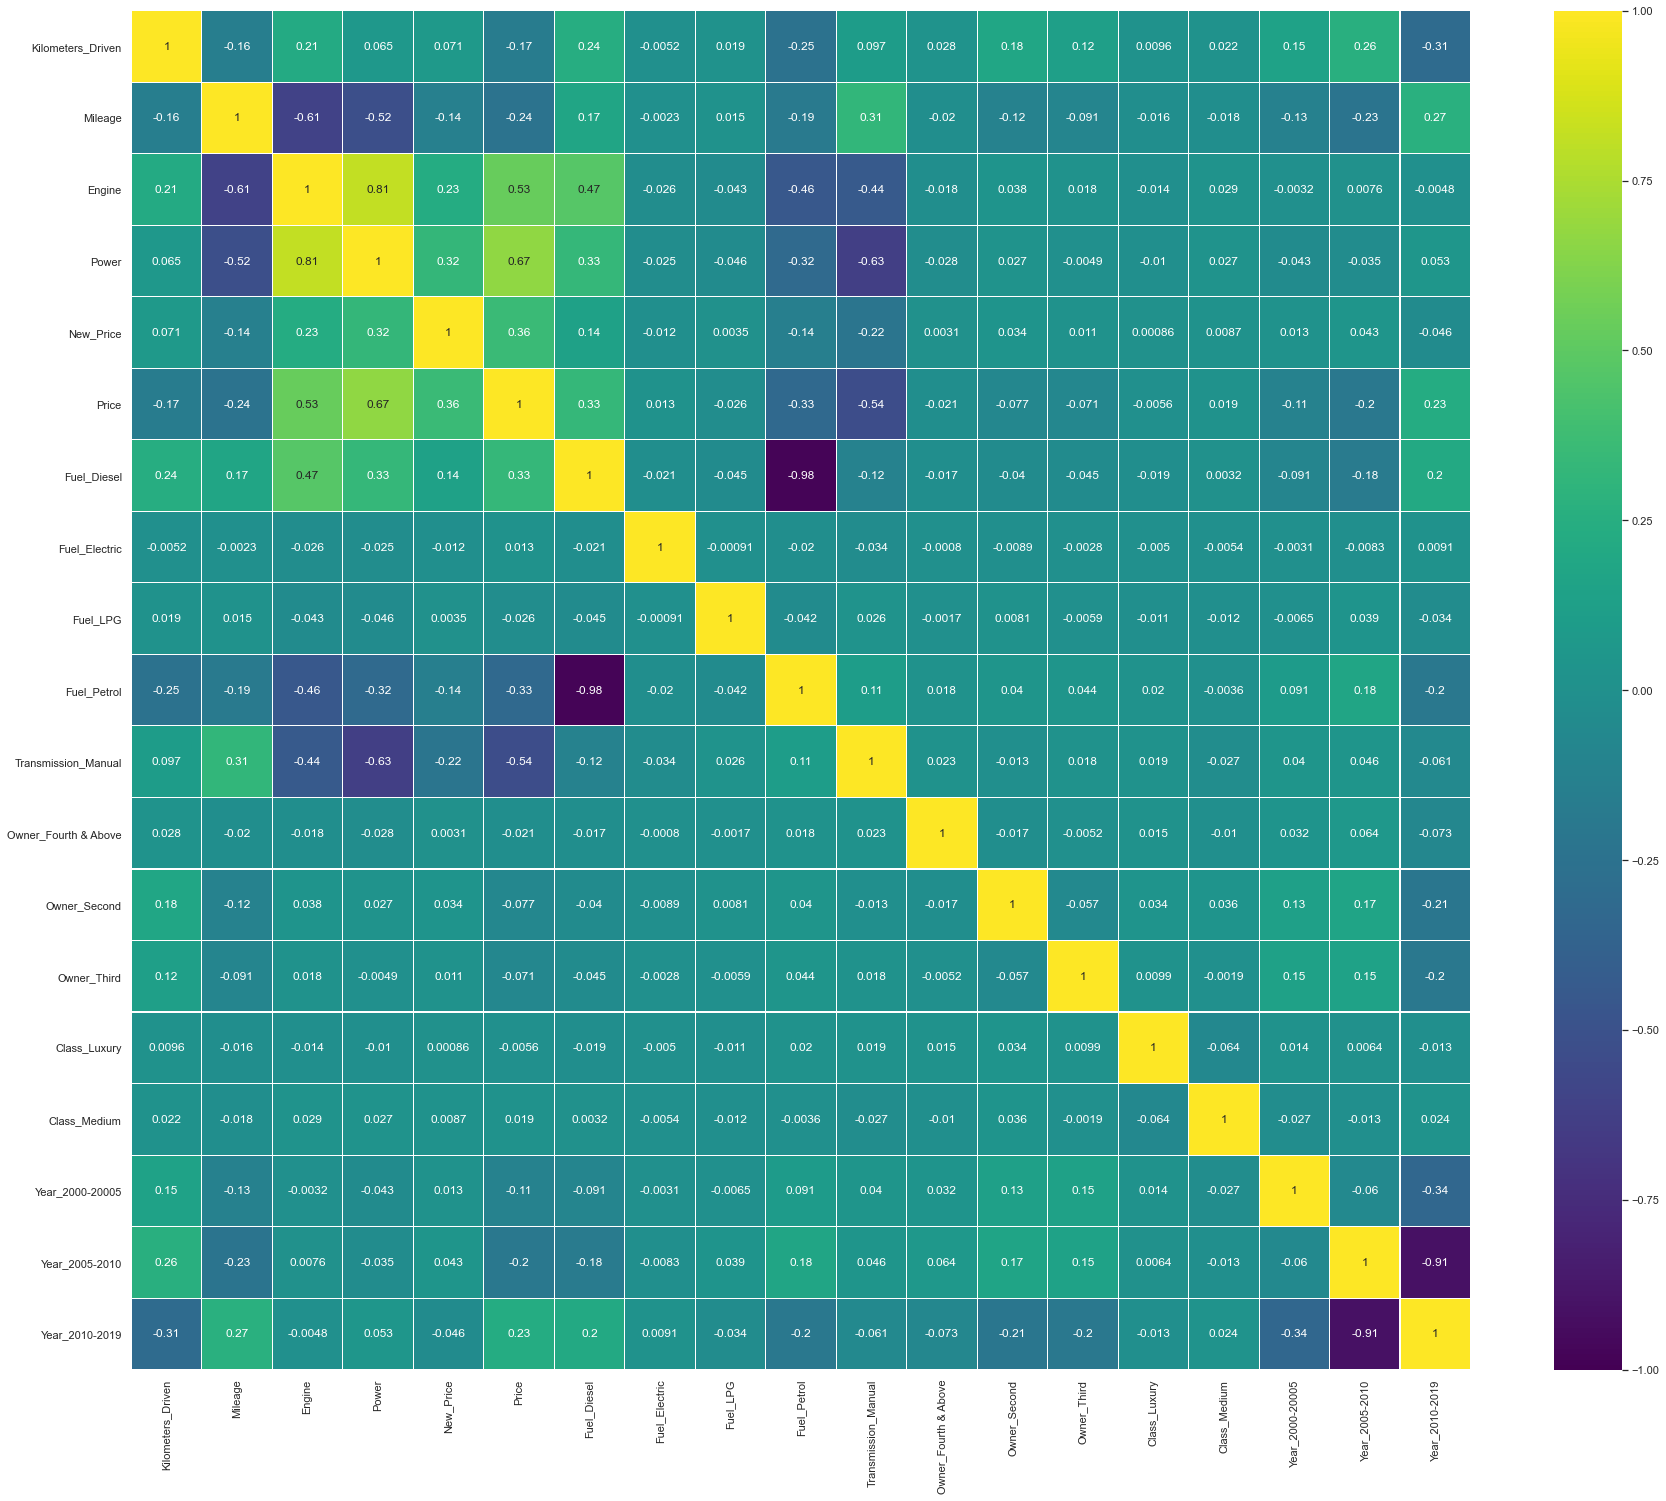

In [357]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))

sns.heatmap(car_train.corr(), vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)
plt.show()

#### Dividing train set into X and Y sets for the model building

In [369]:
y_train1 = car_train.drop(['Price'], axis=1)
X_train1 = car_train

In [370]:
y_test1=car_test.drop(['Price'], axis=1)
X_test1=car_test

## Choose Model, Train and Evaluate

In [371]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train1, y_train1)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test1)

Intercept of the linear equation: [ 3.33066907e-16 -1.44328993e-15  5.55111512e-16  1.49880108e-15
  5.82867088e-16  3.33066907e-16 -5.61616725e-16  1.81278603e-16
  5.55111512e-16  2.22044605e-15 -7.10802944e-16  1.66533454e-16
  5.10008702e-16 -2.74780199e-15 -1.45716772e-15  5.86336535e-16
 -1.66533454e-16 -5.55111512e-16]

COefficients of the equation are: [[ 1.00000000e+00  1.05122673e-15 -7.54064280e-16 -6.84506479e-16
  -8.50094358e-17 -2.04251792e-16 -4.62844238e-18 -4.83489365e-17
   1.22895798e-17 -3.73982746e-17 -6.61811743e-16 -1.23970178e-18
   1.79067921e-16 -1.32385458e-16 -9.72053206e-16 -7.28252213e-16
  -2.03578734e-16  4.80169196e-17  1.57212902e-16]
 [ 1.27537698e-15  1.00000000e+00  1.70967676e-15  9.57560212e-16
   2.57029468e-16  7.51779284e-17 -1.85357274e-16 -1.37795666e-16
   3.55230922e-16  1.40636883e-16  8.23725242e-16 -1.67586260e-16
  -3.70275277e-16 -1.11959376e-16  1.82119507e-15  4.40194241e-16
   4.76756476e-16 -6.46987310e-16  3.76868619e-17]
 [-1.17

## lets look at model performances

In [372]:
# Mean Absolute Error on test
mean_absolute_error(y_test1, pred)


2.5447556712436504e-11

In [373]:
# RMSE on test data
mean_squared_error(y_test1, pred)**0.5

4.083890523160904e-11

In [374]:
# R2 Squared: on test
r2_score(y_test1, pred)

0.9444444444444444

R^2 (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

R^2 value is 0.94 which means that in this model independent variables are able to explain 94% of variances in dependent variable

### Conclusion

- The Training and testing scores are around 94% and both scores are comparable, hence the model is a good fit.

- R2_score is 0.94, that explains 94% of total variation in the dataset. So, overall the model is very satisfactory.

### Recursive Feature Elimination
##### This is an efficient approach for eliminating features from a training dataset for feature selection.

In [386]:
y_train2 = car_train.pop('Price')
X_train2 = car_train

In [387]:
# Importing RFE 
from sklearn.feature_selection import RFE


# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train2, y_train2)

rfe = RFE(lm, 11)                # running RFE
rfe = rfe.fit(X_train2, y_train2)

list(zip(X_train2.columns,rfe.support_,rfe.ranking_))

[('Kilometers_Driven', True, 1),
 ('Mileage', False, 6),
 ('Engine', True, 1),
 ('Power', True, 1),
 ('New_Price', True, 1),
 ('Fuel_Diesel', True, 1),
 ('Fuel_Electric', True, 1),
 ('Fuel_LPG', True, 1),
 ('Fuel_Petrol', False, 3),
 ('Transmission_Manual', True, 1),
 ('Owner_Fourth & Above', True, 1),
 ('Owner_Second', False, 5),
 ('Owner_Third', False, 4),
 ('Class_Luxury', False, 7),
 ('Class_Medium', False, 8),
 ('Year_2000-20005', True, 1),
 ('Year_2005-2010', True, 1),
 ('Year_2010-2019', False, 2)]

In [388]:
# List of columns selected by RFE technique
col = X_train2.columns[rfe.support_]
col

Index(['Kilometers_Driven', 'Engine', 'Power', 'New_Price', 'Fuel_Diesel',
       'Fuel_Electric', 'Fuel_LPG', 'Transmission_Manual',
       'Owner_Fourth & Above', 'Year_2000-20005', 'Year_2005-2010'],
      dtype='object')

### Building model using statsmodel for the detailed statistics

### MODEL1

In [389]:
# Creating X_test dataframe with RFE selected variables
X_train_2 = X_train2[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_2 = sm.add_constant(X_train_2)

lm_1 = sm.OLS(y_train2,X_train_2).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     564.1
Date:                Fri, 19 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:37:40   Log-Likelihood:                 5221.8
No. Observations:                4682   AIC:                        -1.042e+04
Df Residuals:                    4670   BIC:                        -1.034e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0322 

In [390]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_2.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Engine,30.04
2,Power,17.76
3,New_Price,7.47
0,Kilometers_Driven,6.31
7,Transmission_Manual,4.29
4,Fuel_Diesel,2.89
10,Year_2005-2010,1.38
9,Year_2000-20005,1.09
6,Fuel_LPG,1.01
8,Owner_Fourth & Above,1.01


Engine has high VIF so it can be dropped

### MODEL 2

In [393]:
X_train_3 = X_train_2.drop(["Engine"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_3 = sm.add_constant(X_train_3)

lm_2 = sm.OLS(y_train2,X_train_3).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     618.7
Date:                Fri, 19 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:50:11   Log-Likelihood:                 5217.6
No. Observations:                4682   AIC:                        -1.041e+04
Df Residuals:                    4671   BIC:                        -1.034e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0403 

In [394]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_3.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,New_Price,7.33
0,Kilometers_Driven,5.94
1,Power,5.62
6,Transmission_Manual,3.36
3,Fuel_Diesel,2.68
9,Year_2005-2010,1.37
8,Year_2000-20005,1.09
5,Fuel_LPG,1.01
7,Owner_Fourth & Above,1.01
4,Fuel_Electric,1.00


Whereas if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.
Here now none of the variables are exceeding above 5

In [396]:
# Let us check correlation between the features to decide which has highest multicollinearity
X.corr()

,Kilometers_Driven,Power,New_Price,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Transmission_Manual,Owner_Fourth & Above,Year_2000-20005,Year_2005-2010
Kilometers_Driven,1.000000,0.065001,0.070642,0.243936,-0.005189,0.019311,0.097018,0.027671,0.152655,0.261533
Power,0.065001,1.000000,0.324526,0.334694,-0.024971,-0.046243,-0.625283,-0.028172,-0.042782,-0.034936
New_Price,0.070642,0.324526,1.000000,0.141052,-0.012431,0.003509,-0.224264,0.003094,0.013143,0.042936
Fuel_Diesel,0.243936,0.334694,0.141052,1.000000,-0.021110,-0.044814,-0.117549,-0.017397,-0.090928,-0.177492
Fuel_Electric,-0.005189,-0.024971,-0.012431,-0.021110,1.000000,-0.000907,-0.034385,-0.000800,-0.003085,-0.008315
Fuel_LPG,0.019311,-0.046243,0.003509,-0.044814,-0.000907,1.000000,0.026384,-0.001698,-0.006549,0.038685
Transmission_Manual,0.097018,-0.625283,-0.224264,-0.117549,-0.034385,0.026384,1.000000,0.023264,0.040022,0.046236
Owner_Fourth & Above,0.027671,-0.028172,0.003094,-0.017397,-0.000800,-0.001698,0.023264,1.000000,0.032092,0.064269
Year_2000-20005,0.152655,-0.042782,0.013143,-0.090928,-0.003085,-0.006549,0.040022,0.032092,1.000000,-0.060026
Year_2005-2010,0.261533,-0.034936,0.042936,-0.177492,-0.008315,0.038685,0.046236,0.064269,-0.060026,1.000000


Power seems to have correlation with other features.Dropping this will improve the VIF of the model.

### MODEL 3

In [397]:
X_train_4 = X_train_3.drop(["Power"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_4 = sm.add_constant(X_train_4)

lm_4 = sm.OLS(y_train2,X_train_4).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     446.6
Date:                Fri, 19 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:06:37   Log-Likelihood:                 4696.0
No. Observations:                4682   AIC:                            -9372.
Df Residuals:                    4672   BIC:                            -9308.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1484 

In [398]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_4.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Kilometers_Driven,5.59
1,New_Price,4.25
5,Transmission_Manual,2.91
2,Fuel_Diesel,2.46
8,Year_2005-2010,1.37
7,Year_2000-20005,1.09
4,Fuel_LPG,1.01
6,Owner_Fourth & Above,1.01
3,Fuel_Electric,1.00


Fuel_LPG has high p-value ,so it can be dropped

### MODEL4

In [400]:
X_train_5 = X_train_4.drop(["Fuel_LPG"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_5 = sm.add_constant(X_train_5)

lm_5 = sm.OLS(y_train2,X_train_5).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     502.5
Date:                Fri, 19 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:13:05   Log-Likelihood:                 4696.0
No. Observations:                4682   AIC:                            -9374.
Df Residuals:                    4673   BIC:                            -9316.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1484 

In [401]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_5.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Kilometers_Driven,5.58
1,New_Price,4.25
4,Transmission_Manual,2.90
2,Fuel_Diesel,2.45
7,Year_2005-2010,1.37
6,Year_2000-20005,1.09
5,Owner_Fourth & Above,1.01
3,Fuel_Electric,1.00


Fuel_Electric has high p-value ,so it can be dropped

### MODEL5

In [402]:
X_train_6 = X_train_5.drop(["Fuel_Electric"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_6 = sm.add_constant(X_train_6)

lm_6 = sm.OLS(y_train2,X_train_6).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     574.4
Date:                Fri, 19 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:16:57   Log-Likelihood:                 4695.8
No. Observations:                4682   AIC:                            -9376.
Df Residuals:                    4674   BIC:                            -9324.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1485 

In [403]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_6.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Kilometers_Driven,5.58
1,New_Price,4.25
3,Transmission_Manual,2.90
2,Fuel_Diesel,2.45
6,Year_2005-2010,1.37
5,Year_2000-20005,1.09
4,Owner_Fourth & Above,1.01


Owner_Fourth & Above has high p-value; can be dropped

### MODEL6

In [404]:
X_train_7 = X_train_6.drop(["Owner_Fourth & Above"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_7 = sm.add_constant(X_train_7)

lm_7 = sm.OLS(y_train2,X_train_7).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     670.1
Date:                Fri, 19 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:20:10   Log-Likelihood:                 4695.7
No. Observations:                4682   AIC:                            -9377.
Df Residuals:                    4675   BIC:                            -9332.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1485    

In [405]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_7.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Kilometers_Driven,5.58
1,New_Price,4.25
3,Transmission_Manual,2.90
2,Fuel_Diesel,2.45
5,Year_2005-2010,1.37
4,Year_2000-20005,1.09



### None of the VIF's are above 10  and from the summary we can see that none of them have significant p-value (> 0.05). So we can conclude that this is our final model

### Residual Analysis of the train data

### a) Normal Distribution of error terms
        
To check if the error terms are normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [406]:
y_train_pred = lm_7.predict(X_train_7)

Text(0.5, 0, 'Errors')

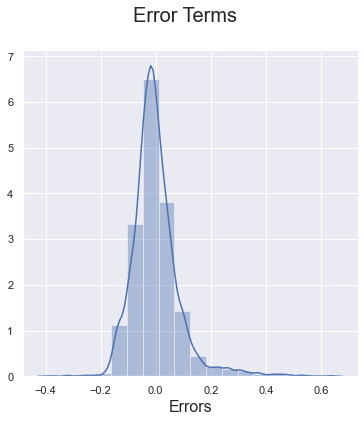

In [408]:
# plot the histogram of the error terms
fig = plt.figure(figsize=(6,6))
sns.distplot((y_train2 - y_train_pred), bins = 18)
fig.suptitle('Error Terms', fontsize = 20)                # Plot heading   
plt.xlabel('Errors', fontsize = 16)                         # X-label

### b) Tests for Heteroscedasticity

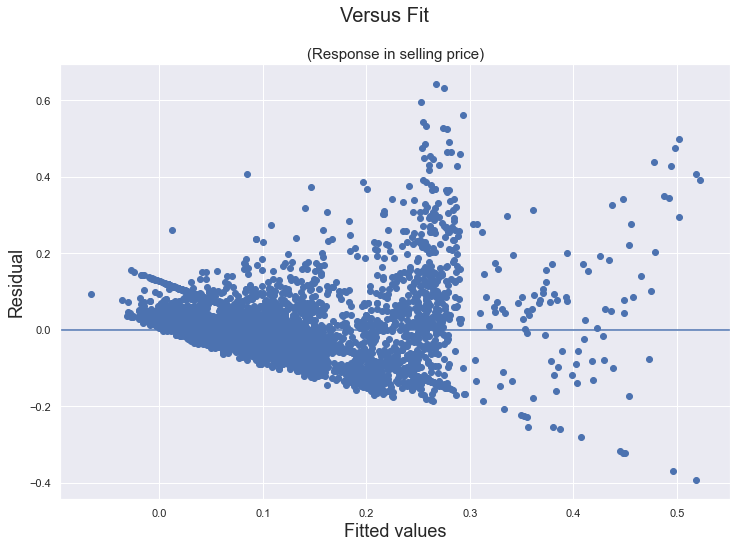

In [411]:
resid = lm_7.resid
fig = plt.figure(figsize = (12,8))
plt.scatter(y_train_pred, resid)
fig.suptitle('Versus Fit', fontsize = 20)
plt.title('(Response in selling price)',  fontsize = 15)    
plt.xlabel('Fitted values', fontsize = 18)
plt.ylabel('Residual', fontsize = 18)           
plt.axhline(0, 0,8)
plt.show()

We observe that residuals are randomly distributed and there is no definite pattern observed. Thus basic assumption of linear regression for residual terms i.e homoscedasticity is satisfied.

### Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, let us now make predictions using our final model.

In [431]:
car_test.describe()

,Kilometers_Driven,Mileage,Engine,Power,New_Price,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Transmission_Manual,Owner_Fourth & Above,Owner_Second,Owner_Third,Class_Luxury,Class_Medium,Year_2000-20005,Year_2005-2010,Year_2010-2019
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.0,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,0.409348,18.554001,1545.122571,106.223886,0.685481,-0.174734,0.0,0.001495,0.481315,-0.024357,0.000997,0.146487,0.017439,0.053812,0.068759,-0.006998,-0.045341,0.839562
std,0.207224,3.947993,491.072241,40.309343,0.324682,0.002593,0.0,0.038643,0.499775,0.000147,0.031560,0.353682,0.130933,0.225702,0.253108,0.001963,0.004228,0.367104
min,0.006337,8.700000,624.000000,34.200000,-0.241117,-0.177386,0.0,0.000000,0.000000,-0.024615,0.000000,0.000000,0.000000,0.000000,0.000000,-0.007236,-0.047074,0.000000
25%,0.250992,16.000000,1197.000000,78.450000,0.714705,-0.177386,0.0,0.000000,0.000000,-0.024274,0.000000,0.000000,0.000000,0.000000,0.000000,-0.007236,-0.047074,1.000000
50%,0.397656,18.500000,1461.000000,93.700000,0.714705,-0.172199,0.0,0.000000,0.000000,-0.024274,0.000000,0.000000,0.000000,0.000000,0.000000,-0.007236,-0.047074,1.000000
75%,0.533743,21.100000,1968.000000,126.240000,0.714705,-0.172199,0.0,0.000000,1.000000,-0.024274,0.000000,0.000000,0.000000,0.000000,0.000000,-0.007236,-0.047074,1.000000
max,1.000000,28.400000,2999.000000,224.340000,3.590355,-0.172199,0.0,1.000000,1.000000,-0.024274,1.000000,1.000000,1.000000,1.000000,1.000000,0.009209,-0.035035,1.000000


### Dividing into X_test and y_test

In [415]:
y_test = car_Test.pop('Price')
X_test = car_Test

col=X_train_7.columns[1:]
X_test_7 = X_test[col]

In [416]:
# Adding a constant variable 
import statsmodels.api as sm  
X_test_7 = sm.add_constant(X_test_7)

In [417]:
X_test_7.shape

(2007, 7)

In [418]:
# making predictions usingthe final model
y_pred_7 = lm_7.predict(X_test_7)

In [421]:
# Evaluate the r2
from sklearn.metrics import r2_score
r2 = r2_score(y_true = y_train2, y_pred = y_train_pred)
print('Coefficient of determination for train data: %.3f' % r2) 

r2 = r2_score(y_true = y_test, y_pred = y_pred_7)
print('Coefficient of determination for test data: %.3f' % r2) 


Coefficient of determination for train data: 0.462
Coefficient of determination for test data: -1.108


There is a difference in Coefficient of Train Data and Test Data

In [422]:
#RMSE mean for test dataset
import math
from sklearn.metrics import mean_squared_error
Rmse = math.sqrt(mean_squared_error(y_test, y_pred_7)) 
print('Root mean square error: %.3f' % Rmse)

Root mean square error: 10.858


### Conslusion

RM Square is high ,so this model is not good fit.So we can say that initial model we built Training and testing scores are around 94% and both scores are comparable, hence that model is a good fit.R2_score is 0.94, that explains 94% of total variation in the dataset. So, overall that model is very satisfactory.

##### Recoomandetion to Business 

-With the Increase in Power ,Engine ,New Price and if Fuel Type is Diseal ,the Price of Car in Pre-Owned market increases

-With the Increase in Kilometers_Driven , Mileage ,the Price  Car in Pre-owned market decreases
